# Scenario: Comparing different implementations of the same thresholding algorithm
In this notebook we will compare different implementations of the same algorithm. As example, we select Otsu's method for binary threesholding in combination with [connected component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling). The algorithm was published more than 40 years ago and one could presume that all common implementations of this algorithm show identical results.

## See also
* [A Threshold Selection Method from Gray-Level Histograms (N. Otsu 1979)](https://ieeexplore.ieee.org/document/4310076)

In [1]:
from skimage.io import imread, imshow, imsave
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

## Implementation 1: ImageJ

As first implementation, we take a look at [ImageJ](https://imagej.nih.gov/ij/index.html). We will use it as part of the [Fiji distribution](https://fiji.sc/). The following [ImageJ Macro](https://imagej.nih.gov/ij/developer/macro/macros.html) code opens "blobs.tif", thresholds it using Otsu's method and applied connected component labeling. The resulting label image is stored to disk. You can execute this script in Fiji's script editor by clicking on `File > New > Script`.

**Note:** When executing this script, you should adapt the path of the image data so that it runs on your computer.

In [2]:
with open('blobs_segmentation_imagej.ijm') as f:
    print(f.read())

open("C:/structure/code/clesperanto_SIMposium/blobs.tif");

// binarization
setAutoThreshold("Otsu dark");
setOption("BlackBackground", true);
run("Convert to Mask");

// Connected component labeling + measurement
run("Analyze Particles...", "  show=[Count Masks] ");

// Result visualization
run("glasbey on dark");

// Save results
saveAs("Tiff", "C:/structure/code/clesperanto_SIMposium/blobs_labels_imagej.tif");



The result looks then like this:

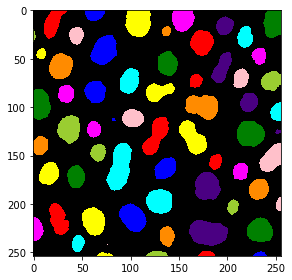

In [3]:
imagej_label_image = imread("blobs_labels_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)

## Implementation 2: scikit-image
As a second implementation we will use [scikit-image](https://scikit-image.org/). As it can be used from juypter notebooks, we can also have a close look again at the workflow.

We start with loading and visualizing the raw blobs image.

C:\Users\rober\miniconda3\envs\bio_39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


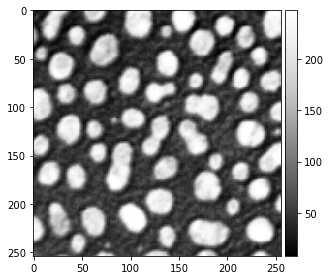

In [4]:
blobs_image = imread("blobs.tif")
imshow(blobs_image, cmap="Greys_r")

The [`threshold_otsu` method](https://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=threshold%20otsu#skimage.filters.threshold_otsu) is then used to binarize the image.

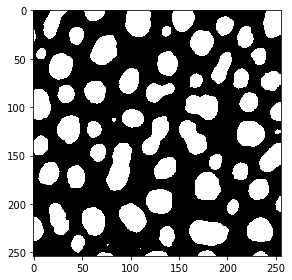

In [5]:
# determine threshold
threshold = threshold_otsu(blobs_image)

# apply threshold
binary_image = blobs_image > threshold

imshow(binary_image)

For connected component labeling, we use the [`label` method](https://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label). The visualization of the label image is produced using the [`label2rgb` method](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.label2rgb).

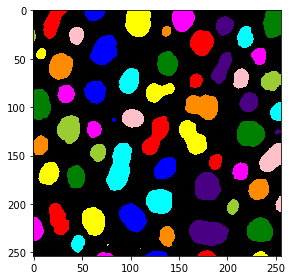

In [6]:
# connected component labeling
skimage_label_image = label(binary_image)

# visualize it in colours
visualization = label2rgb(skimage_label_image, bg_label=0)
imshow(visualization)

To compare the images later, we also save this one to disk.

In [7]:
imsave("blobs_labels_skimage.tif", skimage_label_image)

C:\Users\rober\AppData\Local\Temp\ipykernel_6744\179771585.py:1: UserWarning: blobs_labels_skimage.tif is a low contrast image
  imsave("blobs_labels_skimage.tif", skimage_label_image)


## Implementation 3: clesperanto / python
The third implementation of the same workflow also runs from python and uses [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype).

**Note:** When executing this script, you should adapt the path of the image data so that it runs on your computer.

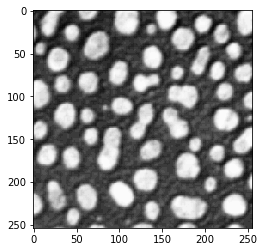

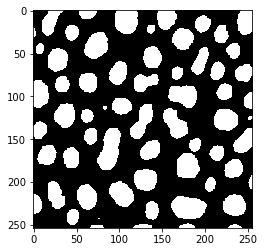

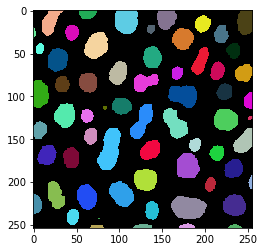

In [8]:
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

We will also save this image for later comparison.

In [9]:
imsave("blobs_labels_clesperanto_python.tif", label_image)

## Implementation 4: clesperanto / Jython

The fourth implementation uses clesperanto within Fiji. To make this script run in Fiji, please activate the clij, [clij2](https://clij.github.io/) and [clijx-assistant](https://clij.github.io/clijx-assistant/) update sites in your Fiji. You may notice that this script is identical with the above one. Only saving the result works differently.

**Note:** When executing this script, you should adapt the path of the image data so that it runs on your computer.

In [10]:
with open('blobs_segmentation_clesperanto.py') as f:
    print(f.read())

# To make this script run in Fiji, please activate the clij, clij2
# and clijx-assistant update sites in your Fiji. 
# Read more: 
# https://clij.github.io/
# 
# To make this script run in python, install pyclesperanto_prototype:
# conda install -c conda-forge pyopencl
# pip install pyclesperanto_prototype
# Read more: 
# https://clesperanto.net
# 
import pyclesperanto_prototype as cle

blobs_image = cle.imread("C:/structure/code/clesperanto_SIMposium/blobs.tif")

cle.imshow(blobs_image, "Blobs", False, 0, 255)

# Threshold Otsu
binary_image = cle.create_like(blobs_image)
cle.threshold_otsu(blobs_image, binary_image)

cle.imshow(binary_image, "Threshold Otsu of CLIJ2 Image of blobs.gif", False, 0.0, 1.0)

# Connected Components Labeling Box
label_image = cle.create_like(binary_image)
cle.connected_components_labeling_box(binary_image, label_image)

cle.imshow(label_image, "Connected Components Labeling Box of Threshold Otsu of CLIJ2 Image of blobs.gif", True, 0.0, 64.0)

# The followin

We will also take a look at the result of this workflow:

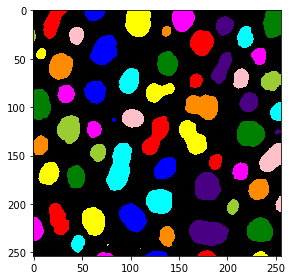

In [11]:
imagej_label_image = imread("blobs_labels_clesperanto_imagej.tif")
visualization = label2rgb(imagej_label_image, bg_label=0)
imshow(visualization)